### THE SPARKS FOUNDATION DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP  #GRIPSEPT 2022

### TASK-3: Performing exploratory data anaylysis on th Retail SampleSuperstore dataset

#### Author: Ngondzana Tikum Michael

**In this project of exploratory data analysis of the SampleSuperstore dataset, the analysis will help us to identify weak areas where can work to increase profits. And equally identify teh problems faced.**

In [2]:
# Importing libraries
import warnings
warnings.filterwarnings(action = 'ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


Loading the data and viewing the first five rows

In [3]:
# Loading the dataset

df = pd.read_csv('SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Exploration

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Checking for null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
# Getting info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
# Dropping the Postal Code and country columns
df.drop(columns = ["Postal Code", "Country"], inplace = True)

In [8]:
# Viewing data after dropping the postal code column
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
# Shape of dataframe before dropping duplicates
df.shape

(9994, 11)

In [10]:
# Searching for duplicate values
print(df.duplicated().sum())

50


In [11]:
# Dropping duplicates
df = df.drop_duplicates( )

In [12]:
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [13]:
# shape after removing duplicates
print(df.shape)

(9944, 11)


In [14]:
# Describing the data
df.describe()

,Sales,Quantity,Discount,Profit
count,9944.000000,9944.000000,9944.000000,9944.000000
mean,230.752150,3.794047,0.156440,28.770873
std,624.644765,2.228752,0.206584,234.841370
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.724800
50%,55.000000,3.000000,0.200000,8.679950
75%,210.104000,5.000000,0.200000,29.534700
max,22638.480000,14.000000,0.800000,8399.976000


In [15]:
# Showing all columns in the datadrame

df.columns.values.tolist()

['Ship Mode',
 'Segment',
 'City',
 'State',
 'Region',
 'Category',
 'Sub-Category',
 'Sales',
 'Quantity',
 'Discount',
 'Profit']

In [16]:
segment = df['Sub-Category'].unique()
segment

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [17]:
# Counting the number by Ship mode

shipping_mode = df['Ship Mode'].value_counts()
shipping_mode

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

## Data Visualization

Text(0, 0.5, 'Quantity shipped')

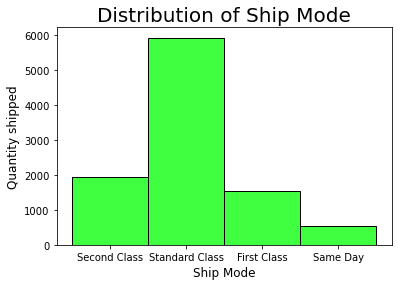

In [18]:
# Distribution plot of Ship Mode

sns.histplot(data=df, x="Ship Mode", color="lime")
plt.title('Distribution of Ship Mode', fontsize = 20)
plt.xlabel('Ship Mode', fontsize = 12)
plt.ylabel('Quantity shipped', fontsize = 12)

From the above visual, we can observe that the most used shipping mode is **standard Class**.

Text(0, 0.5, 'Count per category')

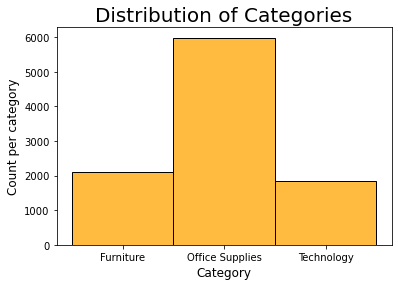

In [19]:
# Distribution plot of Categories

sns.histplot(data=df, x="Category", color="orange")
plt.title('Distribution of Category', fontsize = 20)
plt.xlabel('Category', fontsize = 12)
plt.ylabel('Count per category', fontsize = 12)

Text(0, 0.5, 'Count per Region')

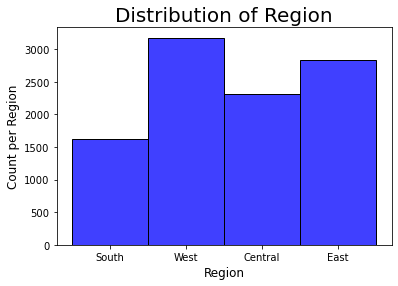

In [20]:
# Distribution plot of Regions

sns.histplot(data=df, x="Region", color="blue")
plt.title('Distribution of Region', fontsize = 20)
plt.xlabel('Region', fontsize = 12)
plt.ylabel('Count per Region', fontsize = 12)

In [21]:
# Subsetting our dataframe for profit
profit_df = df[(df['Profit'] > 0)]
profit_df.shape

(8014, 11)

In [22]:
# Susetting the dataframe for loss
loss_df =df[(df['Profit'] < 0)]
loss_df.shape

(1865, 11)

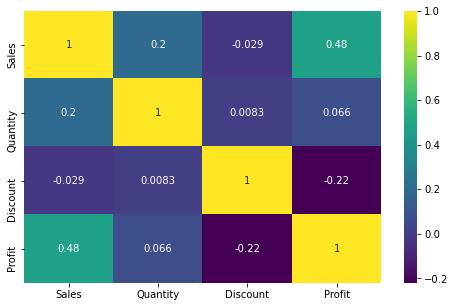

In [23]:
# Plotting a heatmap for quantitative features.
df.corr
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot =True, cmap ="viridis")
plt.show()

#### ***Visualizations on profits***.

In [24]:
# Profits per state 
total_profit_per_state = df.groupby('State')['Profit'].sum()
total_profit_per_state[:5]

State
Alabama        5786.8253
Arizona       -3427.9246
Arkansas       4008.6871
California    76215.9705
Colorado      -6527.8579
Name: Profit, dtype: float64

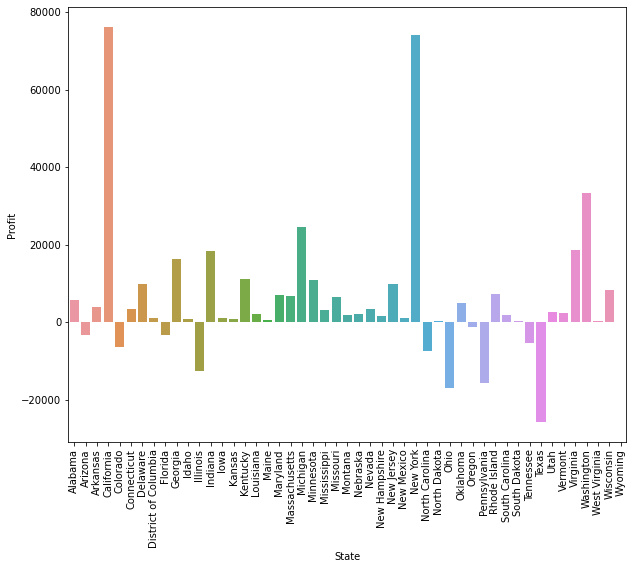

In [25]:
# plotting state wise profits
plt.figure(figsize = (10,8))
sns.barplot(total_profit_per_state.index, total_profit_per_state.values)
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

**Observations:**

* It can be observed that ***california***, ***New York***, ***Washington*** and ***Michigan*** are the top performing states in terms of profit.
* Whereas ***Texas***, ***Ohio***, ***Pennsylvania*** and ***Illinois*** are in loss.


In [26]:
# Profits per category 
total_profit_per_category = df.groupby('Category')['Profit'].sum()
total_profit_per_category

Category
Furniture           18484.9459
Office Supplies    122196.0726
Technology         145416.5394
Name: Profit, dtype: float64

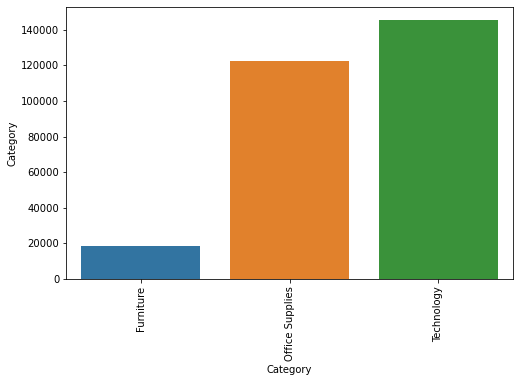

In [44]:
# plotting category wise profits
plt.figure(figsize = (8,5))
sns.barplot(total_profit_per_category.index, total_profit_per_category.values)
plt.ylabel("Category")
plt.xticks(rotation=90)
plt.show()

In [28]:
# Profits per Sub-category 
total_profit_per_sub_category = df.groupby('Sub-Category')['Profit'].sum()
total_profit_per_sub_category

Sub-Category
Accessories    41920.9052
Appliances     18138.0054
Art             6511.8388
Binders        30205.2603
Bookcases      -3398.7542
Chairs         26567.1278
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13042.0534
Labels          5499.1558
Machines        3384.7569
Paper          33830.0381
Phones         44493.0524
Storage        21287.1788
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

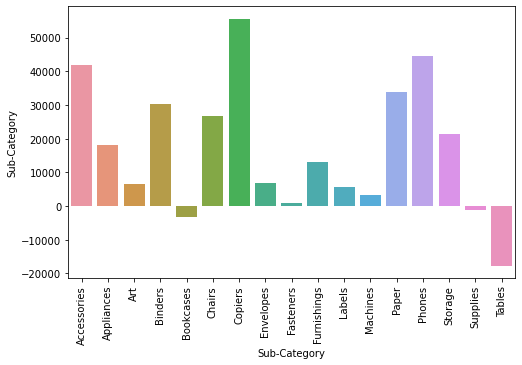

In [42]:
# plotting sub-category wise profits
plt.figure(figsize = (8,5))
sns.barplot(total_profit_per_sub_category.index, total_profit_per_sub_category.values)
plt.ylabel("Sub-Category")
plt.xticks(rotation=90)
plt.show()

**Tables, Bookcases and Supplies are the Sub-categories in loss.**
**Copiers, Phones and Accessories are the top Sub-categories in profit.** 

In [30]:
# Profits per Region 
total_profit_per_region = df.groupby('Region')['Profit'].sum()
total_profit_per_region

Region
Central     39662.0474
East        91471.0909
South       46749.4303
West       108214.9893
Name: Profit, dtype: float64

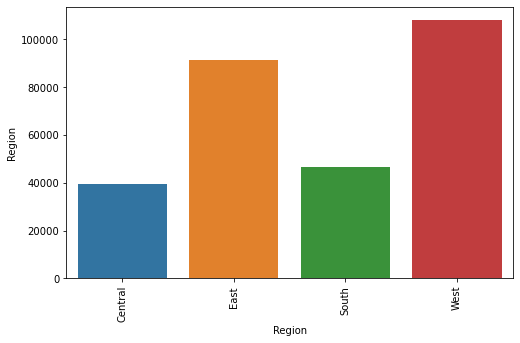

In [45]:
# plotting region wise profits
plt.figure(figsize = (8,5))
sns.barplot(total_profit_per_region.index, total_profit_per_region.values)
plt.ylabel("Region")
plt.xticks(rotation=90)
plt.show()

**The West Region has the highest profit followed by the East.**

#### ***Visualizations on sales***.

In [32]:
# Sales per State 
total_sales_per_state = df.groupby('State')['Sales'].sum()
total_sales_per_state.head()

State
Alabama        19510.6400
Arizona        35282.0010
Arkansas       11678.1300
California    456629.9285
Colorado       32108.1180
Name: Sales, dtype: float64

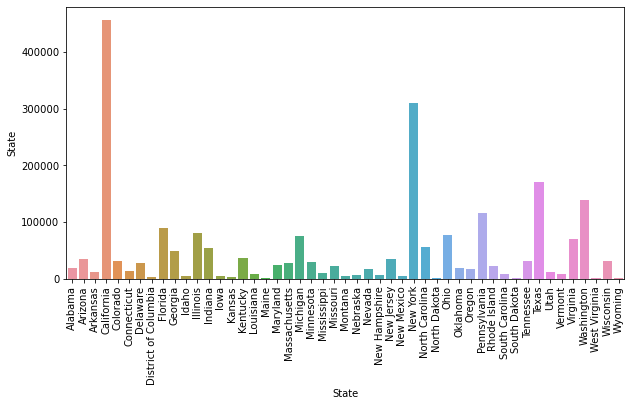

In [47]:
# plotting state wise sales
plt.figure(figsize = (10,5))
sns.barplot(total_sales_per_state.index, total_sales_per_state.values)
plt.ylabel("State")
plt.xticks(rotation=90)
plt.show()

In [34]:
# Sales per State 
total_sales_per_state = df.groupby('State')['Sales'].sum()
total_sales_per_state.head()

State
Alabama        19510.6400
Arizona        35282.0010
Arkansas       11678.1300
California    456629.9285
Colorado       32108.1180
Name: Sales, dtype: float64

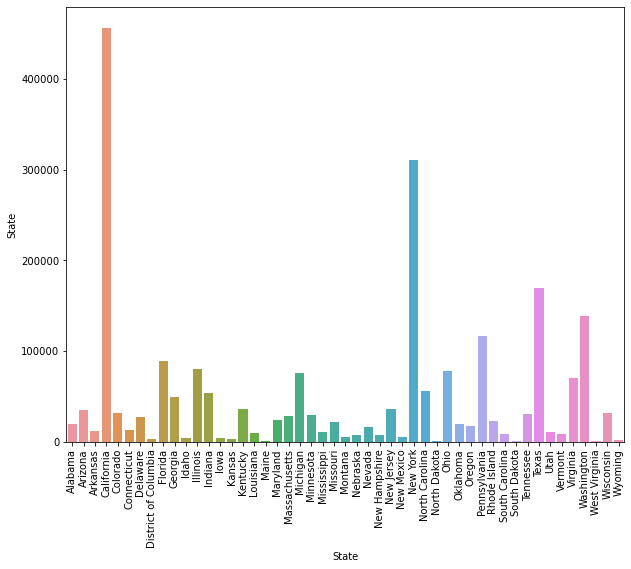

In [49]:
# plotting state wise sales
plt.figure(figsize = (10,8))
sns.barplot(total_sales_per_state.index, total_sales_per_state.values)
plt.ylabel("State")
plt.xticks(rotation=90)
plt.show()

In [36]:
# Sales per Category 
total_sales_per_category = df.groupby('Category')['Sales'].sum()
total_sales_per_category

Category
Furniture          740568.6663
Office Supplies    718256.0700
Technology         835774.6410
Name: Sales, dtype: float64

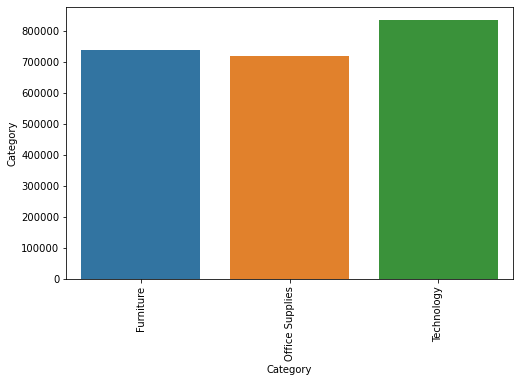

In [51]:
# plotting state wise sales
plt.figure(figsize = (8,5))
sns.barplot(total_sales_per_category.index, total_sales_per_category.values)
plt.ylabel("Category")
plt.xticks(rotation=90)
plt.show()

In [38]:
# Sales per Sub-category 
total_sales_per_sub_category = df.groupby('Sub-Category')['Sales'].sum()
total_sales_per_sub_category.head()

Sub-Category
Accessories    167303.3020
Appliances     107532.1610
Art             27065.7320
Binders        203328.8590
Bookcases      114166.9293
Name: Sales, dtype: float64

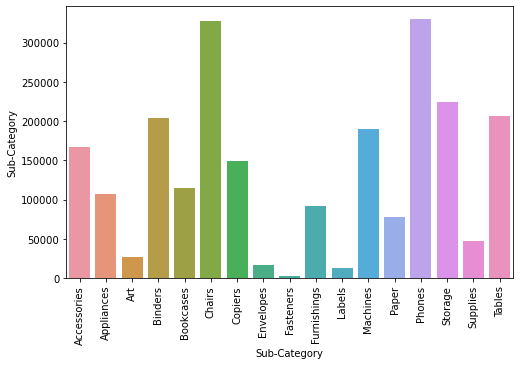

In [52]:
# plotting sub_category wise sales
plt.figure(figsize = (8,5))
sns.barplot(total_sales_per_sub_category.index, total_sales_per_sub_category.values)
plt.ylabel("Sub-Category")
plt.xticks(rotation=90)
plt.show()

In [40]:
# Sales per region 
total_sales_per_region = df.groupby('Region')['Sales'].sum()
total_sales_per_region.head()

Region
Central    500724.2708
East       677843.9080
South      391721.9050
West       724309.2935
Name: Sales, dtype: float64

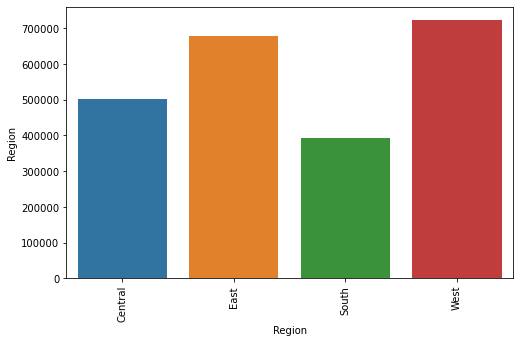

In [53]:
# plotting region wise sales
plt.figure(figsize = (8,5))
sns.barplot(total_sales_per_region.index, total_sales_per_region.values)
plt.ylabel("Region")
plt.xticks(rotation=90)
plt.show()

#### Conlusion

1. We can observe low sales in the South and Central Regions
2. The Sub_categories having the highest sales chairs and phones
3. Technology has the highest sales per category.
4. California, New York, Texas and Washington have the hisghest sales per state.

#### Recommendations

* Sales need to be increased in the South and Central Regions in order to aximize profits since sales and profits are positively coorelated.
* Sales need to be increased for sub_categories Art, Fateners, Envelopes and Labels